
Project Part 1: Text Processing and Exploratory Data Analysis

Team Members:
Alex De La Haya Gutiérrez, 268169
Marc Guiu Armengol, 268920
Nil Tomàs Plans, 268384

Team Code: G_004

---



In [ ]:
import nltk
import json


1.1.  As a first step, you must pre-process the documents. In particular, for the text fields (title, description) you should: (1) Removing stop words, (2) Tokenization, (3) Removing punctuation marks, (4) Stemming, (5) Anything else you think it's needed (bonus point)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Change this address to the one where the .json is stored
with open("/content/drive/Shareddrives/UPF_IRWA_project/fashion_products_dataset.json", "r+", encoding="utf-8") as f:
    dataset = json.load(f)  # Load JSON data into a Python object

In [ ]:
print(dataset[0]['title'])
print(dataset[0]['description'])

Solid Women Multicolor Track Pants
Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import copy
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from collections import Counter
from wordcloud import WordCloud
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1.1 As a first step, you must pre-process the documents. In particular, for the text fields (title, description) you should: (1) Removing stop words, (2) Tokenization, (3) Removing punctuation marks, (4) Stemming, (5) Anything else you think it's needed (bonus point)

In [ ]:
def preprocess_function(lista):

    tokenized_words=[]
    for title in lista:
        tokenized_words.append(word_tokenize(title))

    #print(tokenized_words[0])
    tokenized_words_low=[]
    for title in tokenized_words:
        lower=[]
        for word in title:
            lower.append(word.lower())
        tokenized_words_low.append(lower)

    stop_words = set(stopwords.words('english'))

    #remove stopwords and punctuation signs
    tokenized_words_stpw_punct=[]
    for title in tokenized_words_low:
        clean=[]
        for word in title:
            if word not in stop_words and word not in string.punctuation:
                clean.append(word)

        tokenized_words_stpw_punct.append(clean)

    #Stemming
    stemmer = PorterStemmer()
    clean_tokenized_words=[]
    for title in tokenized_words_stpw_punct:
        array=[]
        for word in title:
            array.append(stemmer.stem(word))
        clean_tokenized_words.append(array)

    #
    return clean_tokenized_words

title_list=[]
desc_list=[]
for doc in dataset:
    title_list.append(doc['title'])
    desc_list.append(doc['description'])

clean_title_words=preprocess_function(title_list)
clean_desc_words=preprocess_function(desc_list)

new_dataset=copy.deepcopy(dataset)

for i, doc in enumerate(new_dataset):
    doc['title_proc'] = ' '.join(clean_title_words[i])
    doc['description_proc'] = ' '.join(clean_desc_words[i])




In [ ]:
display(new_dataset[0]['title_proc'])
display(new_dataset[0]['title'])
display(new_dataset[0]['description_proc'])
display(new_dataset[0]['description'])

'solid women multicolor track pant'

'Solid Women Multicolor Track Pants'

'yorker trackpant made 100 rich comb cotton give rich look.design comfort skin friendli fabric itch-fre waistband great year round use proudli made india'

'Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India'

1.2.   Take into account that for future queries, the final output must return (when present) the following information for each of the selected documents:  pid, title, description,  brand,  category, sub_category, product_details, seller, out_of_stock, selling_price, discount, actual_price, average_rating, url

In [ ]:

final_order = [
    '_id','pid', 'title', 'description', 'brand', 'category', 'sub_category',
    'product_details', 'seller', 'out_of_stock', 'selling_price',
    'discount', 'actual_price', 'average_rating', 'url','images','crawled_at',
    'title_proc', 'description_proc']

dataset_ordered=[]
for doc in new_dataset:
    new={}
    for key in final_order:
        new[key]=doc[key]
    dataset_ordered.append(new)

new_dataset=dataset_ordered
display(new_dataset[0])




{'_id': 'fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a',
 'pid': 'TKPFCZ9EA7H5FYZH',
 'title': 'Solid Women Multicolor Track Pants',
 'description': 'Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India',
 'brand': 'York',
 'category': 'Clothing and Accessories',
 'sub_category': 'Bottomwear',
 'product_details': [{'Style Code': '1005COMBO2'},
  {'Closure': 'Elastic'},
  {'Pockets': 'Side Pockets'},
  {'Fabric': 'Cotton Blend'},
  {'Pattern': 'Solid'},
  {'Color': 'Multicolor'}],
 'seller': 'Shyam Enterprises',
 'out_of_stock': False,
 'selling_price': '921',
 'discount': '69% off',
 'actual_price': '2,999',
 'average_rating': '3.9',
 'url': 'https://www.flipkart.com/yorker-solid-men-multicolor-track-pants/p/itmd2c76aadce459?pid=TKPFCZ9EA7H5FYZH&lid=LSTTKPFCZ9EA7H5FYZHVYXWP0&marketplace=FLIPKART&srno=b_1_1&otracker=browse&fm=organic&iid=177a46eb-d053-4732-b3de-

1.3. Decide how to handle the fields category, sub_category, brand, product_details, and seller during pre-processing. Should they be merged into a single text field, indexed as separate fields in the inverted index or any other alternative? Justify your choice, considering how their distinctiveness may affect retrieval effectiveness. What are pros and cons of each approach?

In [ ]:
# Handling categorical fields for future indexing

indexed_dataset = copy.deepcopy(new_dataset)

def clean_text_field(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

for doc in indexed_dataset:
    # Clean brand, category, sub_category, and seller
    doc['brand_proc'] = clean_text_field(doc.get('brand', ''))
    doc['category_proc'] = clean_text_field(doc.get('category', ''))
    doc['sub_category_proc'] = clean_text_field(doc.get('sub_category', ''))
    doc['seller_proc'] = clean_text_field(doc.get('seller', ''))

    # Flatten product_details: [{'Fabric': 'Cotton'}, {'Pattern': 'Solid'}] to 'fabric cotton pattern solid'
    if isinstance(doc.get('product_details', []), list):
        flat_details = []
        for d in doc['product_details']:
            for k, v in d.items():
                flat_details.append(f"{k.lower()} {v.lower()}")
        doc['product_details_proc'] = clean_text_field(" ".join(flat_details))
    else:
        doc['product_details_proc'] = ""

# Example visualization:
display({
    "brand_proc": indexed_dataset[0]["brand_proc"],
    "category_proc": indexed_dataset[0]["category_proc"],
    "sub_category_proc": indexed_dataset[0]["sub_category_proc"],
    "product_details_proc": indexed_dataset[0]["product_details_proc"],
    "seller_proc": indexed_dataset[0]["seller_proc"],
})


{'brand_proc': 'york',
 'category_proc': 'clothing and accessories',
 'sub_category_proc': 'bottomwear',
 'product_details_proc': 'style code 1005combo2 closure elastic pockets side pockets fabric cotton blend pattern solid color multicolor',
 'seller_proc': 'shyam enterprises'}

1.4. Consider the fields out_of_stock, selling_price, discount, actual_price, and average_rating. Decide how these should be handled during pre-processing to use in further search. Should they be indexed as textual terms?

In [ ]:
# 4. Handling numeric and boolean fields for future search
numeric_dataset = copy.deepcopy(indexed_dataset)

def clean_price(value):
    #Convert price strings like '2,999' to 2999 (int)
    if not isinstance(value, str):
        return None
    value = re.sub(r'[^\d.]', '', value)
    try:
        return int(float(value))
    except:
        return None

def clean_discount(value):
    #Convert '69% off' → 69 (int)
    if not isinstance(value, str):
        return None
    value = re.sub(r'[^\d.]', '', value)
    try:
        return int(value)
    except:
        return None

def clean_rating(value):
    #Convert '3.9' (string) to 3.9 (float)
    try:
        return float(value)
    except:
        return None

for doc in numeric_dataset:
    # Boolean field: keep as-is (already True/False)
    doc['out_of_stock_proc'] = bool(doc.get('out_of_stock', False))

    # Numeric fields: clean and convert
    doc['selling_price_proc'] = clean_price(doc.get('selling_price'))
    doc['actual_price_proc'] = clean_price(doc.get('actual_price'))
    doc['discount_proc'] = clean_discount(doc.get('discount'))
    doc['average_rating_proc'] = clean_rating(doc.get('average_rating'))

# Example of processed output for one product
display({
    "out_of_stock_proc": numeric_dataset[0]["out_of_stock_proc"],
    "selling_price_proc": numeric_dataset[0]["selling_price_proc"],
    "actual_price_proc": numeric_dataset[0]["actual_price_proc"],
    "discount_proc": numeric_dataset[0]["discount_proc"],
    "average_rating_proc": numeric_dataset[0]["average_rating_proc"],
})


{'out_of_stock_proc': False,
 'selling_price_proc': 921,
 'actual_price_proc': 2999,
 'discount_proc': 69,
 'average_rating_proc': 3.9}

PART 2:
When working with data, it is important to have a better understanding of the content and some statistics. Provide an exploratory data analysis to describe the dataset you are working on in this project and explain the decisions made for the analysis. For example, word counting distribution, average sentence length, vocabulary size, ranking of products based on rating, price, discount, top sellers and brands, out_of_stock distribution, word clouds for the most frequent words, and entity recognition. Feel free to do the exploratory analysis and report your findings in the report.  

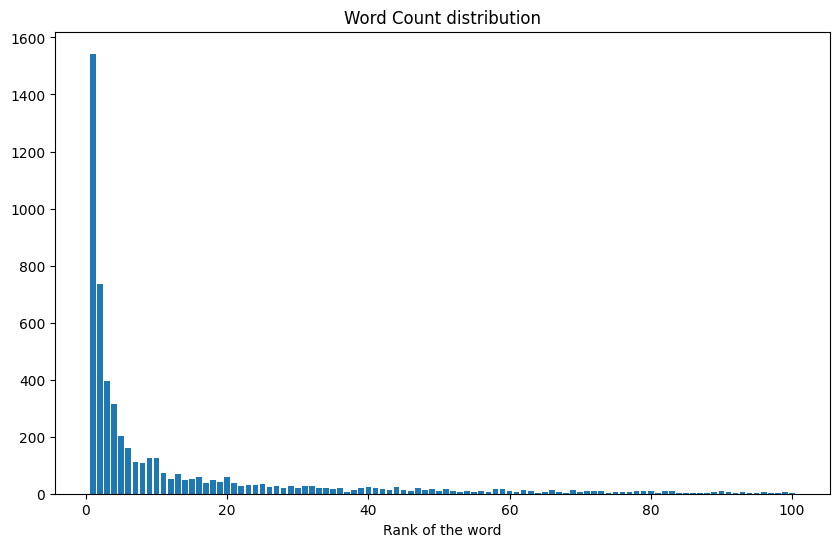

In [ ]:
#WORD COUNT DIST
word_count={}
for doc in new_dataset:
    for key in ['title_proc', 'description_proc']:
        for word in doc[key].split():
            if word in word_count.keys():
                word_count[word]+=1
            else:
                word_count[word]=1

freq_of_freqs = {}
for count in word_count.values():
    if count in freq_of_freqs:
        freq_of_freqs[count] += 1
    else:
        freq_of_freqs[count] = 1


max_freq_to_plot = 100
x = [freq for freq in freq_of_freqs if freq <= max_freq_to_plot]
y = [freq_of_freqs[freq] for freq in x]



plt.figure(figsize=(10,6))
plt.bar(x, y)
plt.xlabel("Rank of the word")
plt.ylabel("")
plt.title("Word Count distribution")
plt.show()

In [ ]:
#Average sentence length
len_arr=[]
for d in new_dataset:
  length=len(d['description_proc'].split())
  len_arr.append(length)

avg_len=np.mean(len_arr)
print("Average sentence length:", round(avg_len, 2))

Average sentence length: 18.84


In [ ]:
#Vocabulary size
vocab = set()
for d in new_dataset:
    vocab.update(d['title_proc'].split())
    vocab.update(d['description_proc'].split())
print("Vocabulary size:", len(vocab))


Vocabulary size: 6143


In [ ]:
#Ranking of products according to rating


# Agrupar ratings per producte
rates_dict = defaultdict(list)
for doc in dataset:
    rate= doc['average_rating']
    if isinstance(rate, str):
        try:
            rate = float(rate)
        except ValueError:
            continue  #skip if
    elif not isinstance(rate, (int, float)):#if not a number skip document
        continue

    rates_dict[doc['title']].append(rate)
# Fer la mitjana
avg_rates=[]
for title, rates in rates_dict.items():
    avg=sum(rates)/len(rates)
    avg_rates.append((title,avg))


sorted_rates = sorted(avg_rates, key=lambda x: x[1], reverse=True)

print(" Top 10 Products by Rating:")
for title, rate in sorted_rates[:10]:
    print(f"{rate} - {title}")



 Top 10 Products by Rating:
5.0 - Tripin Brass Cufflink & Tie Pin Set  (Multicolor)
5.0 - Tripin Brass Cufflink  (Pink)
5.0 - Loafers For Men  (Grey)
5.0 - Walking Shoes For Men  (Red)
5.0 - Walking Shoes For Men  (Green)
5.0 - Solid Women Collared Neck White T-Shirt  (Pack of 2)
5.0 - Solid Men Henley Multicolor T-Shirt  (Pack of 3)
5.0 - Striped V-neck Casual Men Blue, Grey Sweater
5.0 - Printed Women Khaki Chino Shorts
5.0 - Full Sleeve Argyle Men Sweatshirt


In [ ]:
#Ranking price and discount
# price
min_prices = {}
for d in numeric_dataset:
    title = d['title']
    price = d.get('selling_price_proc')
    if price is not None:
        if title not in min_prices or price < min_prices[title]:
            min_prices[title] = price

cheapest_10 = sorted(min_prices.items(), key=lambda x: x[1])[:10]
print("Top 10 Cheapest:")
for title, price in cheapest_10:
    print(f"{price}€: {title}")

#disc
max_disc = {}
for d in numeric_dataset:
    title = d['title']
    disc_value = d.get('discount_proc')
    if disc_value is not None:
        if title not in max_disc or disc_value > max_disc[title]:
            max_disc[title] = disc_value

high_disc_10 = sorted(max_disc.items(), key=lambda x: x[1],reverse=True)[:10]
print("\nTop 10 highest discount:")
for title, price in high_disc_10:
    print(f"{price}%: {title}")

Top 10 Cheapest:
99€: Women Mid-Calf/Crew  (Pack of 2)
99€: Men Printed Bandana
118€: Women Color Block Ankle Length  (Pack of 3)
120€: Women Solid Ankle Length  (Pack of 3)
120€: Men Solid Ankle Length  (Pack of 3)
124€: Cotton 5 panel baseball Cap
125€: Brand Trunk Y- Back Suspenders for Men  (Black)
128€: Printed Women Round Neck White T-Shirt
132€: Men Ankle Length  (Pack of 3)
135€: Sunshopping Y- Back Suspenders for Women, Girls  (Blue)

Top 10 highest discount:
87%: Printed Women Round Neck White T-Shirt
86%: Printed Women Round Neck Grey T-Shirt
85%: Printed Men Round Neck Multicolor T-Shirt  (Pack of 2)
84%: nu-Lite Satin Tie & Cufflink  (Red)
84%: Printed Women Round Neck Blue T-Shirt
84%: Printed Women Round or Crew Black, Grey T-Shirt
84%: Color Block Women Round Neck Green T-Shirt
84%: Printed Men Mandarin Collar Blue T-Shirt
84%: Solid Balclava Cap
84%: Printed Men Collared Neck Multicolor T-Shirt


In [ ]:
def computing_top(field):
    counts = {}
    for d in dataset:
        value = d.get(field)
        if value:
            if value in counts:
                counts[value] += 1
            else:
                counts[value] = 1

    top_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"Top {field}s:", top_items)


fields = ['brand', 'seller']
for field in fields:
    computing_top(field)


Top brands: [('ECKO Unl', 951), ('Free Authori', 860), ('ARBO', 806), ('REEB', 802), ('Pu', 798), ('True Bl', 793), ('Keo', 660), ('Amp', 585), ('Black Beat', 548), ('vims rai', 503)]
Top sellers: [('RetailNet', 1411), ('SandSMarketing', 887), ('BioworldMerchandising', 842), ('ARBOR', 783), ('Keoti', 660), ('AFFGARMENTS', 587), ('Black Beatle', 548), ('AMALGUS ENTERPRISE', 477), ('Tayab Manch Fashions', 436), ('KAPSONSRETAILPVTLTD', 415)]


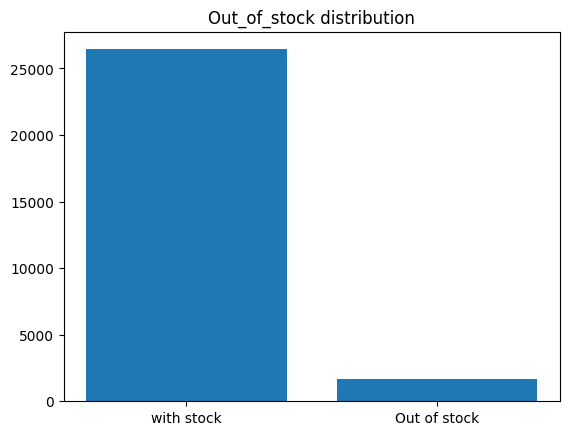

In [ ]:
#Out_of_stock_distribution
in_stock = sum(not d.get('out_of_stock', False) for d in dataset)
out_stock = sum(d.get('out_of_stock', False) for d in dataset)
plt.bar(['with stock','Out of stock'], [in_stock, out_stock])
plt.title('Out_of_stock distribution');
plt.show()


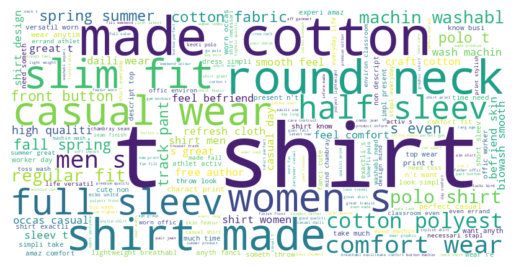

In [ ]:
#word clouds

all_text = " ".join(d['description_proc'] for d in new_dataset)
wc = WordCloud(width=800, height=400, background_color='white',random_state=42).generate(all_text)
plt.imshow(wc, interpolation='bilinear'); plt.axis('off'); plt.show()


In [53]:
#entity recognition

nlp = spacy.load("en_core_web_sm")
# Agafem els 200 primers textos
sample_texts = [d['description_proc'] for d in numeric_dataset[:200]]

all_ents = []
for text in sample_texts:
    doc = nlp(text)
    all_ents.extend([ent.label_ for ent in doc.ents])  # només guardem el tipus

# Comptar el número total per cada tipus d'entitat
label_counts = Counter(all_ents)

print(" Total number of entities of each tupe:")
for label, count in label_counts.most_common():
    print(f"{label} : {count}")


 Total number of entities of each tupe:
CARDINAL : 117
PERSON : 115
DATE : 97
ORG : 94
GPE : 64
ORDINAL : 39
NORP : 10
